In [1]:
import numpy as np
import statsmodels.api as sm
import matplotlib.pyplot as plt
from scipy import random

In [2]:
import toolbox as tb
from importlib import reload

In [3]:
reload(tb)

<module 'toolbox' from 'C:\\Users\\luisr\\SharedProjects\\ESL\\Notebooks\\toolbox.py'>

In [4]:
random.seed(42)
blue_means = random.multivariate_normal([1,0], np.eye(2), size=10)
orange_means = random.multivariate_normal([0,1], np.eye(2), size=10)

In [5]:
def generate_data(population_means, n):
    data_pts = []
    for i in random.choice(list(range(len(population_means))), n):
        data_pts.append(random.multivariate_normal(population_means[i], np.eye(2)/5))
    return np.stack(data_pts)

In [6]:
blue_data = generate_data(blue_means, 100)
orange_data = generate_data(orange_means, 100)

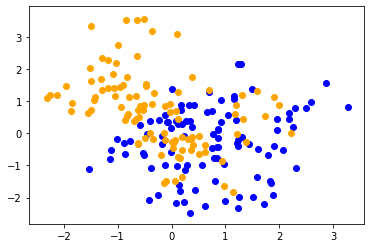

In [7]:
tb.scatter_points(blue_data, 'blue')
tb.scatter_points(orange_data, 'orange')

In [8]:
from sklearn.neighbors import KNeighborsClassifier

In [9]:
X = np.vstack([blue_data, orange_data])
Y = np.hstack([np.array([x]*len(blue_data)) for x in [0,1]])

In [10]:
knn = KNeighborsClassifier(n_neighbors=5)
res = knn.fit(X, Y)

In [11]:
y_train_pred = res.predict(X)

In [12]:
from sklearn.metrics import classification_report

In [49]:
tb.confusion_matrix(Y, y_train_pred)

,predicted_0,predicted_1
actual_0,91,9
actual_1,13,87


In [50]:
print(classification_report(Y, y_train_pred))

              precision    recall  f1-score   support

           0       0.88      0.91      0.89       100
           1       0.91      0.87      0.89       100

    accuracy                           0.89       200
   macro avg       0.89      0.89      0.89       200
weighted avg       0.89      0.89      0.89       200



In [51]:
def error(y_true, y_pred):
    wrong = np.sum((y_true - y_pred) != 0)
    return wrong/len(y_true)

In [52]:
error(Y, y_train_pred)

0.11

In [53]:
oos_blue = generate_data(blue_means, 5000)
oos_orange = generate_data(orange_means, 5000)
X_test = np.vstack([oos_blue, oos_orange])
Y_test = np.hstack([np.array([x]*len(oos_blue)) for x in [0,1]])

In [54]:
%%time
train_errors = []
test_errors = []
for k in range(1,150):
    knn = KNeighborsClassifier(n_neighbors=k)
    res = knn.fit(X, Y)
    y_train_pred = res.predict(X)
    train_error = error(Y, y_train_pred)
    train_errors.append(train_error)
    y_pred = res.predict(X_test)
    test_error = error(Y_test, y_pred)
    test_errors.append(test_error)
    

Wall time: 44.6 s


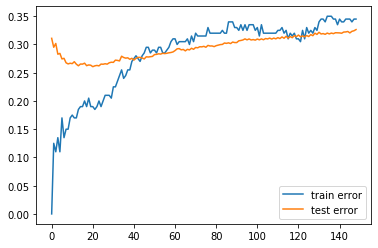

In [55]:
plt.plot(train_errors, label='train error')
plt.plot(test_errors, label='test error')
plt.legend()

In [61]:
res = tb.linear_model(X, Y)

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       0.282
Model:                            OLS   Adj. R-squared:                  0.274
Method:                 Least Squares   F-statistic:                     38.61
Date:                Wed, 20 Jan 2021   Prob (F-statistic):           7.14e-15
Time:                        13:58:07   Log-Likelihood:                -112.09
No. Observations:                 200   AIC:                             230.2
Df Residuals:                     197   BIC:                             240.1
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.5103      0.032     16.131      0.000       0.448       0.573
x1            -0.1666      0.029     -5.701      0.000      -0.224      -0.109
x2             0.1217      0.026      4.670      0.000       0.070       0.173
==============================================================================
Omnibus:                       69.446   Durbin-Watson:                   0.594
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               12.466
Skew:                           0.218   Prob(JB):                      0.00196
Kurtosis:                       1.857   Cond. No.                         1.58
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [62]:
train_preds = res.predict(sm.add_constant(X))
y_train_pred = np.where(train_preds > 0.5, 1, 0)

In [63]:
test_preds = res.predict(sm.add_constant(X_test))
y_test_pred = np.where(test_preds > 0.5, 1, 0)

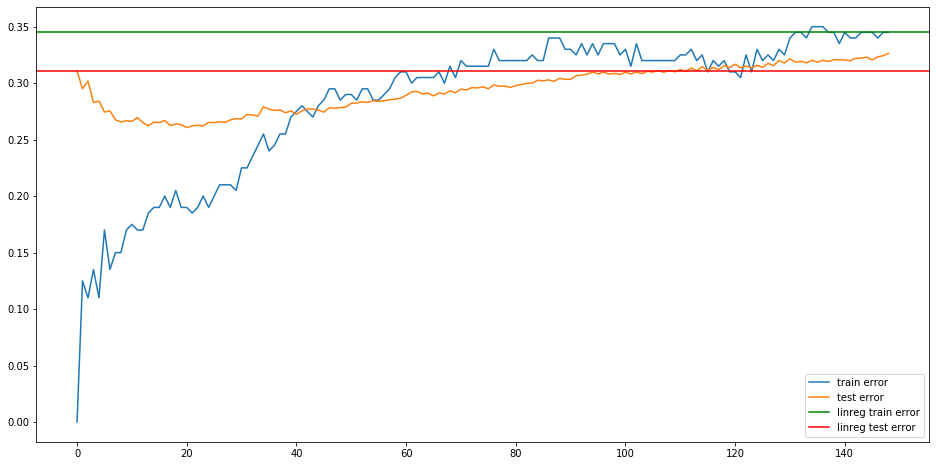

In [64]:
fig = plt.figure(figsize=(16,8))
plt.plot(train_errors, label='train error')
plt.plot(test_errors, label='test error')
plt.axhline(error(Y, y_train_pred), label='linreg train error', color = 'green')
plt.axhline(error(Y_test, y_test_pred), label='linreg test error', color = 'red')
plt.legend()